In [140]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [76]:
data=pd.read_csv("C:\\Users\\Dedshan Vimukthi\\Documents\\Dataset3\\cardio.CSV")

In [77]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [52]:
data.drop("id",axis=1,inplace=True)

In [78]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [79]:
data.fillna(0)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [80]:
data.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [81]:
data.duplicated().sum()

0

In [82]:
data.duplicated().sum()

0

In [83]:
data["age"]=(data["age"]/365).values.astype(int)

In [84]:
data["bmi"]=data["weight"]/((data["height"]/100)**2)

In [85]:
data.drop(["height","weight"],axis=1,inplace=True)

In [86]:
data.head()

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,50,2,110,80,1,1,0,0,1,0,21.967120
1,1,55,1,140,90,3,1,0,0,1,1,34.927679
2,2,51,1,130,70,3,1,0,0,0,1,23.507805
3,3,48,2,150,100,1,1,0,0,1,1,28.710479
4,4,47,1,100,60,1,1,0,0,0,0,23.011177


<AxesSubplot:>

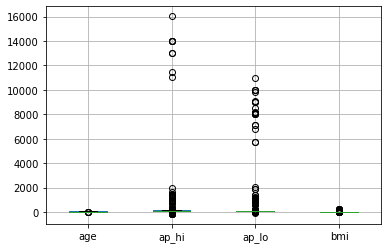

In [87]:
data[["age","ap_hi","ap_lo","bmi"]].boxplot()

In [88]:
data_num=data[["age","ap_hi","ap_lo","bmi"]]

In [89]:
Q1=data_num.quantile(0.25)
Q3=data_num.quantile(0.75)

IQR=Q3-Q1

In [90]:
IQR

age      10.000000
ap_hi    20.000000
ap_lo    10.000000
bmi       6.347107
dtype: float64

In [91]:
(data_num<(Q1-1.5*IQR))|(data_num>(Q3+1.5*IQR))

,age,ap_hi,ap_lo,bmi
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,True,False
...,...,...,...,...
69995,False,False,False,False
69996,False,False,False,True
69997,False,True,False,False
69998,False,False,False,False


In [92]:
out_rows=((data_num<(Q1-1.5*IQR))|(data_num>(Q3+1.5*IQR))).any(axis=1)

In [93]:
data=data[~out_rows]

<AxesSubplot:>

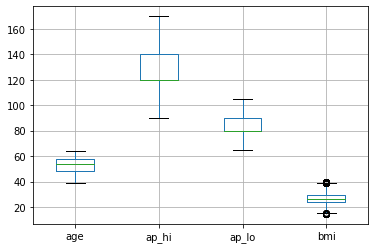

In [94]:
data[["age","ap_hi","ap_lo","bmi"]].boxplot()

In [95]:
data[["age","ap_hi","ap_lo","bmi"]].describe()

,age,ap_hi,ap_lo,bmi
count,62745.000000,62745.000000,62745.000000,62745.000000
mean,52.882413,126.404319,81.689537,27.034727
std,6.746333,14.296927,7.673500,4.406103
min,39.000000,90.000000,65.000000,14.479500
25%,48.000000,120.000000,80.000000,23.875115
50%,54.000000,120.000000,80.000000,26.222222
75%,58.000000,140.000000,90.000000,29.757585
max,64.000000,170.000000,105.000000,39.736121


In [98]:
data["cardio"].value_counts()

0    31783
1    30962
Name: cardio, dtype: int64

C:\Users\Dedshan Vimukthi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


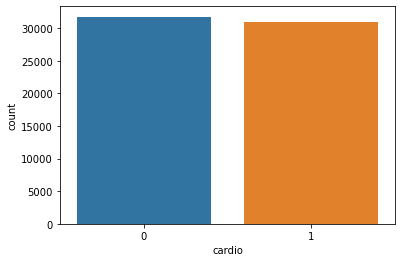

In [102]:
sns.countplot(data["cardio"])
plt.show()

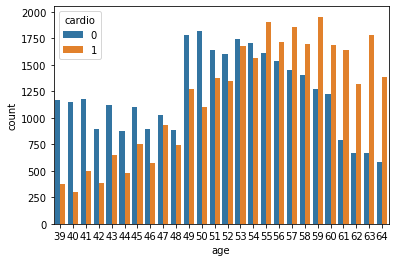

In [103]:
sns.countplot(data=data,x="age",hue="cardio")
plt.show()

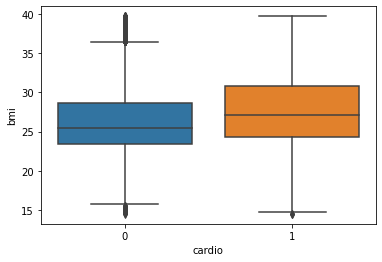

In [104]:
sns.boxplot(x="cardio",y="bmi",data=data)
plt.show()

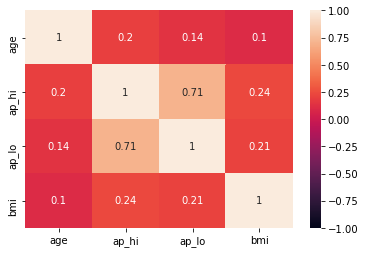

In [107]:
sns.heatmap(data[["age","ap_hi","ap_lo","bmi"]].corr(),annot=True,vmin=-1,vmax=1)
plt.show()

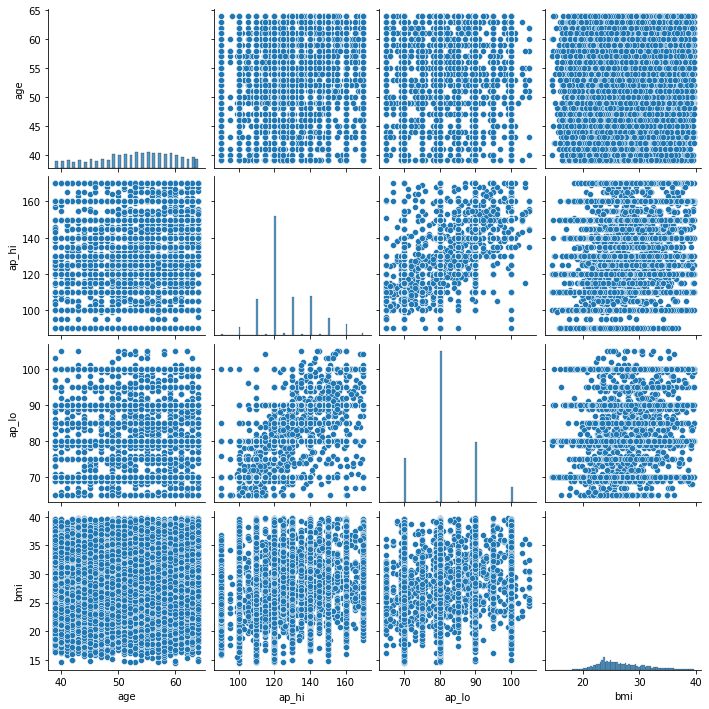

In [109]:
sns.pairplot(data[["age","ap_hi","ap_lo","bmi"]])
plt.show()

In [110]:
data

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,50,2,110,80,1,1,0,0,1,0,21.967120
1,1,55,1,140,90,3,1,0,0,1,1,34.927679
2,2,51,1,130,70,3,1,0,0,0,1,23.507805
3,3,48,2,150,100,1,1,0,0,1,1,28.710479
5,8,60,1,120,80,2,2,0,0,0,0,29.384676
...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,53,1,130,90,1,1,0,0,1,1,23.661439
69994,99992,57,1,150,80,1,1,0,0,1,1,29.384757
69995,99993,52,2,120,80,1,1,1,0,1,0,26.927438
69998,99998,61,1,135,80,1,2,0,0,0,1,27.099251


In [111]:
df=data[["age","ap_hi","ap_lo","bmi"]]
df["cardio"]=["Yes" if m==1 else "No" for m in data["cardio"]]
df.head()

<ipython-input-111-4fa16b72b9e2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cardio"]=["Yes" if m==1 else "No" for m in data["cardio"]]


,age,ap_hi,ap_lo,bmi,cardio
0,50,110,80,21.967120,No
1,55,140,90,34.927679,Yes
2,51,130,70,23.507805,Yes
3,48,150,100,28.710479,Yes
5,60,120,80,29.384676,No


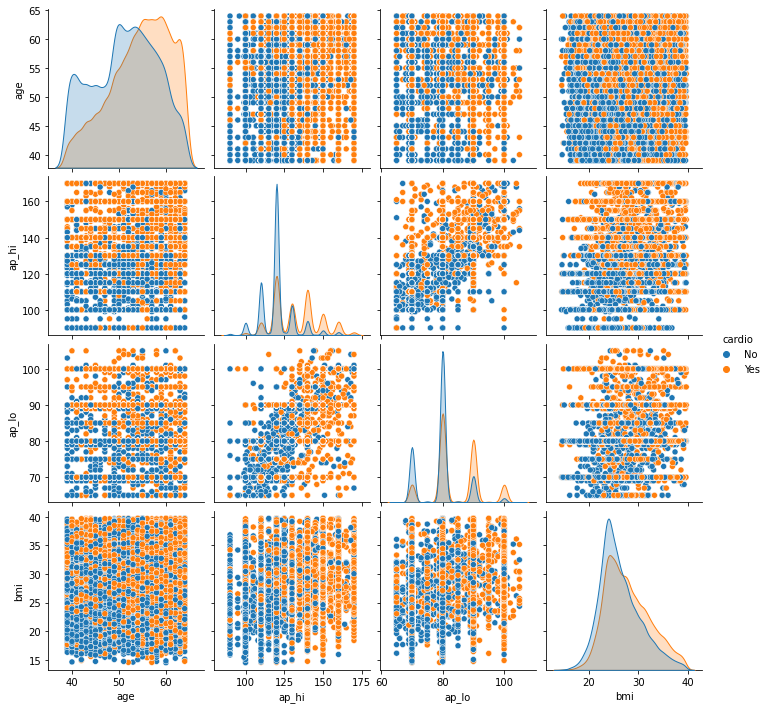

In [112]:
sns.pairplot(df,hue="cardio")
plt.show()

In [114]:
le=LabelEncoder()
data["gender"]=le.fit_transform(data["gender"])

In [115]:
data.head()

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,50,1,110,80,1,1,0,0,1,0,21.967120
1,1,55,0,140,90,3,1,0,0,1,1,34.927679
2,2,51,0,130,70,3,1,0,0,0,1,23.507805
3,3,48,1,150,100,1,1,0,0,1,1,28.710479
5,8,60,0,120,80,2,2,0,0,0,0,29.384676


In [117]:
data=data.reindex(columns=["age","ap_hi","ap_lo","bmi","gender","cholesterol","gluc","smoke","alco","active","cardio"])

In [118]:
data.head()

,age,ap_hi,ap_lo,bmi,gender,cholesterol,gluc,smoke,alco,active,cardio
0,50,110,80,21.967120,1,1,1,0,0,1,0
1,55,140,90,34.927679,0,3,1,0,0,1,1
2,51,130,70,23.507805,0,3,1,0,0,0,1
3,48,150,100,28.710479,1,1,1,0,0,1,1
5,60,120,80,29.384676,0,2,2,0,0,0,0


In [119]:
ohe=OneHotEncoder()

In [124]:
ohot_encoded1=ohe.fit_transform(data["cholesterol"].values.reshape(len(data["cholesterol"]),1)).toarray()
ohot_encoded1=ohot_encoded1[:,1:].astype(int)
df_ohot1=pd.DataFrame(ohot_encoded1,columns=["Above Nor Chol","Well Above Nor Chol"])
df_ohot1

,Above Nor Chol,Well Above Nor Chol
0,0,0
1,0,1
2,0,1
3,0,0
4,1,0
...,...,...
62740,0,0
62741,0,0
62742,0,0
62743,0,0


In [125]:
ohot_encoded2=ohe.fit_transform(data["gluc"].values.reshape(len(data["gluc"]),1)).toarray()
ohot_encoded2=ohot_encoded2[:,1:].astype(int)
df_ohot2=pd.DataFrame(ohot_encoded2,columns=["Above Nor gluc","Well Above Nor gluc"])
df_ohot2

,Above Nor gluc,Well Above Nor gluc
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0
...,...,...
62740,0,0
62741,0,0
62742,0,0
62743,1,0


In [126]:
data.reset_index(inplace=True)
data

,index,age,ap_hi,ap_lo,bmi,gender,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,110,80,21.967120,1,1,1,0,0,1,0
1,1,55,140,90,34.927679,0,3,1,0,0,1,1
2,2,51,130,70,23.507805,0,3,1,0,0,0,1
3,3,48,150,100,28.710479,1,1,1,0,0,1,1
4,5,60,120,80,29.384676,0,2,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
62740,69993,53,130,90,23.661439,0,1,1,0,0,1,1
62741,69994,57,150,80,29.384757,0,1,1,0,0,1,1
62742,69995,52,120,80,26.927438,1,1,1,1,0,1,0
62743,69998,61,135,80,27.099251,0,1,2,0,0,0,1


In [127]:
data.drop("index",axis=1,inplace=True)
data.head()

,age,ap_hi,ap_lo,bmi,gender,cholesterol,gluc,smoke,alco,active,cardio
0,50,110,80,21.967120,1,1,1,0,0,1,0
1,55,140,90,34.927679,0,3,1,0,0,1,1
2,51,130,70,23.507805,0,3,1,0,0,0,1
3,48,150,100,28.710479,1,1,1,0,0,1,1
4,60,120,80,29.384676,0,2,2,0,0,0,0


In [129]:
x=pd.concat([data.iloc[:,:10],df_ohot1,df_ohot2],axis=1)
x.head()

,age,ap_hi,ap_lo,bmi,gender,cholesterol,gluc,smoke,alco,active,Above Nor Chol,Well Above Nor Chol,Above Nor gluc,Well Above Nor gluc
0,50,110,80,21.967120,1,1,1,0,0,1,0,0,0,0
1,55,140,90,34.927679,0,3,1,0,0,1,0,1,0,0
2,51,130,70,23.507805,0,3,1,0,0,0,0,1,0,0
3,48,150,100,28.710479,1,1,1,0,0,1,0,0,0,0
4,60,120,80,29.384676,0,2,2,0,0,0,1,0,1,0


In [130]:
x.drop(["cholesterol","gluc"],axis=1,inplace=True)

In [131]:
x.head()

,age,ap_hi,ap_lo,bmi,gender,smoke,alco,active,Above Nor Chol,Well Above Nor Chol,Above Nor gluc,Well Above Nor gluc
0,50,110,80,21.967120,1,0,0,1,0,0,0,0
1,55,140,90,34.927679,0,0,0,1,0,1,0,0
2,51,130,70,23.507805,0,0,0,0,0,1,0,0
3,48,150,100,28.710479,1,0,0,1,0,0,0,0
4,60,120,80,29.384676,0,0,0,0,1,0,1,0


In [132]:
x=x.values
y=data.iloc[:,10].values

In [134]:
sc=StandardScaler()

In [135]:
x[:,:4]=sc.fit_transform(x[:,:4])

In [136]:
x[:,:4]

array([[-0.42725964, -1.14741093, -0.2201799 , -1.15014289],
       [ 0.31388961,  0.95095888,  1.08301675,  1.79138238],
       [-0.27902979,  0.25150228, -1.52337654, -0.80046937],
       ...,
       [-0.13079994, -0.44795433, -0.2201799 , -0.02435046],
       [ 1.20326872,  0.60123058, -0.2201799 ,  0.01464426],
       [ 0.46211946, -0.44795433, -0.2201799 , -0.48143443]])

In [138]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [142]:
model1=KNeighborsClassifier(n_neighbors=50)
model2=LogisticRegression()
model3=SVC(kernel="rbf",C=1)
model4=RandomForestClassifier(n_estimators=500)

T1=("knn",model1)
T2=("lgr",model2)
T3=("svm",model3)
T4=("rf",model4)

model=VotingClassifier(estimators=[T1,T2,T3,T4],voting="hard")

In [143]:
model.fit(x_train,y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=50)),
                             ('lgr', LogisticRegression()), ('svm', SVC(C=1)),
                             ('rf', RandomForestClassifier(n_estimators=500))])

In [144]:
y_pred=model.predict(x_test)

In [145]:
accuracy_score(y_pred,y_test)

0.7253167583074348

In [146]:
confusion_matrix(y_test,y_pred)

array([[5195, 1220],
       [2227, 3907]], dtype=int64)